plt에서 한글을 쓰기 위해 Nanum 설치

In [ ]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
#런타임 다시 실행

NanumBarunGothic


필요 라이브러리

In [ ]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta
import datetime as dt
from collections import Counter

구글 계정과 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


크롤링해서 가져온 csv파일 들고 오기

In [ ]:
food_comment = pd.read_csv('/content/drive/MyDrive/data/food_comment.csv') # 음식점에 대한 댓글 정보
travel_comment = pd.read_csv('/content/drive/MyDrive/data/comment_info.csv') # 관광지에 대한 댓글 정보

food_place = pd.read_csv('/content/drive/MyDrive/data/food_place.csv')
travel_place = pd.read_csv('/content/drive/MyDrive/data/place_info.csv')

트렌드 분석을 위해 최근 3개월간의 데이터를 뽑아서 구,군별 댓글수를 구할려고 함.
먼저 검색할 날짜를 설정

In [ ]:
now = dt.datetime.now()

startMonth = now.month -3
endMonth = now.month
year = str(now.year)


if startMonth < 10:
  startMonth = '0'+ str(startMonth)


if endMonth < 10:
  endMonth = '0'+ str(endMonth)

음식점 데이터 중에서 댓글이 있고 최근 3개월 이내에 작성된 댓글들의 수를 가져옴 

In [ ]:


food_datelist = food_comment['created_at'].to_list()
food_idx = []
food_notNullidx = food_comment[pd.notnull(food_comment['comment'])].index #댓글이 있는 것만 추출
for i in range(len(food_datelist)):
  date = food_datelist[i].split('.')
  if date[0] == year and  startMonth <= date[1] <= endMonth and i in food_notNullidx:
    food_idx.append(i)
print('6월에서 9월까지 댓글 개수 : {}'.format(len(food_idx)))


place_food_count = dict(Counter(food_comment['place_name'][food_idx]))
print(place_food_count)


6월에서 9월까지 댓글 개수 : 14620
{'본참치': 5, '뚱보집': 7, '노티스': 1, '부산원조꼼장어맛집 성일집': 3, '중앙모밀': 2, '그집곱도리탕 본점': 4, '돌쇠장작구이': 4, '뽕사시미': 7, '라이프버거': 7, '백구당': 1, '신디시스': 1, '물레방아즉석구이': 1, '40카레': 2, '무궁화': 6, '부광돼지국밥': 2, '마구로테이블': 2, '중앙식당': 2, '달달술집': 1, '중앙곰탕': 1, '바븐': 1, '실비집': 1, '겐짱카레 본점': 2, '통영멸치쌈밥집': 1, '굿올데이즈카페': 1, '구포밀면': 3, '한양왕순대 돼지국밥': 5, '후지라멘': 2, '부산복집': 1, '와키와키커피': 3, '대림김밥': 1, '생강나무': 2, '바래': 2, '써브웨이 부산중앙점': 2, '이자카야카도': 1, '새포항물회': 2, '디저트카페 고마워': 1, '오봉집 중앙점': 1, '예가보쌈': 1, '분식공장': 2, '컴포즈커피 중앙동40계단점': 1, '순애돼지국밥': 1, '중앙동12시': 1, '이삭토스트 부산중앙점': 1, '밀양돼지국밥': 4, 'T.G.I.FRiDAYS 롯데광복점': 1, '청춘탕수육': 1, '시골 통돼지볶음전문점': 1, '향원반점': 1, '오로지디저트': 1, '연경재': 6, '삼시세끼': 1, '화반 중앙4호점': 1, '소니가는 홍게': 1, 'B4': 1, '다솥 롯데백화점 광복점': 1, '말자씨부엌': 1, '전통남원원조추어탕': 1, '오니기리와이규동 부산중앙동점': 1, '다무치아': 1, '대경돼지국밥': 1, '하라쿠시동': 1, '온기정 롯데백화점 광복점': 3, '어빈': 1, '냠냠숯불두마리치킨 중앙점': 1, '호랭이국수': 2, '하나돈까스 광복점': 2, '해물원조아구찜': 1, '담원집': 1, '에스페랑스 중앙점': 1, '미주스': 1, '차한잔': 1, '뼈대짬뽕': 1, '씨유투모로우': 2, '오색면전': 1, '청금

관광지 데이터 중에서 댓글이 있고 최근 3개월 이내에 작성된 댓글들의 수를 가져옴 

In [ ]:
travel_datelist = travel_comment['created_at'].to_list()
travel_idx = []
travel_notNullidx = travel_comment[pd.notnull(travel_comment['comment'])].index
for i in range(len(travel_datelist)):
  date = travel_datelist[i].split('.')
  if date[0] == year and  startMonth <= date[1] <= endMonth and i in travel_notNullidx:
    travel_idx.append(i)
print('6월에서 9월까지 댓글 개수 : {}'.format(len(travel_idx)))

place_travel_count = dict(Counter(travel_comment['place_name'][travel_idx]))
print(place_travel_count)


6월에서 9월까지 댓글 개수 : 306
{'보수동책방골목': 2, '다이아몬드타워': 6, '국제시장먹자골목': 1, '남포동 포장마차거리': 2, '팥빙수골목': 1, '용두산': 1, '초량이바구길': 1, '168계단모노레일': 3, '부산역광장': 2, '닥밭골벽화마을': 1, '영도대교 포장마차거리': 1, '중앙공원 충혼탑': 1, '텍사스거리': 3, '비석문화마을': 1, '감천문화마을': 1, '수정': 1, '평화의소녀상': 1, '흰여울문화마을': 9, '송도해상케이블카 송도베이스테이션': 10, '송도해수욕장': 3, '흰여울 해안터널': 1, '좌천동굴': 1, '송도해수욕장 다이빙대': 1, '장승 외7점': 1, '송도폭포': 1, '증산왜성': 1, '송도해상케이블카 송도스카이파크': 5, '캐니언파크 문현점': 2, '런닝맨 부산점': 3, '쌈마이웨이촬영지': 1, '친구의거리': 1, '태종대자갈마당': 2, '황령산 봉수대': 3, '동매산': 1, '황령산': 3, '황령산전망쉼터': 2, '만취길': 3, '천제산': 1, '전리단길': 1, '송상현광장': 1, '태종대유원지': 2, '괴정천': 1, '낙동강하구둑전망대': 1, '태종대 전망대': 1, '몰운대유원지': 1, '맹금머리등': 1, '광안리해수욕장': 12, '광안리관광안내소': 1, '오륙도스카이워크': 4, '오륙도': 1, '최동원동상': 1, '주전자섬(생도)': 1, '덕석바위': 1, '동래사직단': 1, '온천천카페거리': 1, '대영해수온천': 1, '만덕고개누리길전망데크': 1, '호텔농심 허심청': 9, '금강공원 금강케이블카': 2, '쇠미산어귀전망대': 1, '동래고읍성': 1, '대성관온천': 2, '벽초온천': 1, '주라지 신세계센텀시티점': 2, '윤산': 1, '옥봉산': 1, '갈맷길8코스1구간 종점인증대': 1, '금정산부곡온천': 7, '금정산성 동문': 1, '장산': 1, '금정산 삼각바위': 1, '박차정의사 상

개별 관광지 장소에 몇개의 댓글이 달렸는지 확인했으니 해당 장소에 대응하는 주소를 들고와서 장소, 이름, 댓글수 정보가 담긴 csv 파일을 만든다.

In [ ]:
travel_address = travel_place['address'].to_list()
address = []
for i in travel_address:
  address.append(i.split()[1])

find_idx = []
length = len(travel_place)
for i in range(length):
  if travel_place['place_name'][i] in list(place_travel_count.keys()):
    find_idx.append(i)

place_address = []
for i in find_idx:
  place_address.append(address[i])

count = []
for i in find_idx:
  count.append(place_travel_count[travel_place['place_name'][i]])

regiontravelData = {'place_name' : travel_place['place_name'][find_idx].to_list(),
        'address' : place_address,
        'count' : count
        }
df = pd.DataFrame(regiontravelData)
df.to_csv("/content/drive/MyDrive/data/regiontravelData.csv", index=False)
df.to_excel("/content/drive/MyDrive/data/regiontravelData.xlsx", index=False)

음식점도 관광지와 마찬가지로 csv파일을 만들어 준다.

In [ ]:
food_address = food_place['address'].to_list()
address = []
for i in food_address:
  address.append(i.split()[1])

find_idx = []
length = len(food_place)
for i in range(length):
  if food_place['name'][i] in list(place_food_count.keys()):
    find_idx.append(i)

place_address = []
for i in find_idx:
  place_address.append(address[i])

count = []
for i in find_idx:
  count.append(place_food_count[food_place['name'][i]])

regionFoodData = {'place_name' : food_place['name'][find_idx].to_list(),
        'address' : place_address,
        'count' : count
        }
df = pd.DataFrame(regionFoodData)
df.to_csv("/content/drive/MyDrive/data/regionFoodData.csv", index=False)
df.to_excel("/content/drive/MyDrive/data/regionFoodData.xlsx", index=False)


만든 파일을 불려온다.

In [ ]:
regionTravel = pd.read_csv('/content/drive/MyDrive/data/regiontravelData.csv')
regionFood = pd.read_csv('/content/drive/MyDrive/data/regionFoodData.csv')

전체 데이터의 주소를 확인해서 어떤 구와 군이 있는지 확인한다. 

In [ ]:
travelRegion = np.unique(regionTravel['address'])
foodRegion = np.unique(regionFood['address'])
print(travelRegion)
print(len(travelRegion))
print(foodRegion)
print(len(foodRegion))

Region = []
if len(travelRegion) < len(foodRegion):
  Region = foodRegion
else:
  Region = travelRegion

['강서구' '금정구' '기장군' '남구' '동구' '동래구' '부산진구' '사하구' '서구' '수영구' '연제구' '영도구'
 '중구' '해운대구']
14
['강서구' '금정구' '기장군' '남구' '동구' '동래구' '부산진구' '북구' '사상구' '사하구' '서구' '수영구'
 '연제구' '영도구' '중구' '해운대구']
16


음식점 데이터를 이용해 구와 군별로 댓글수가 많은 10개의 장소를 표시한다. 

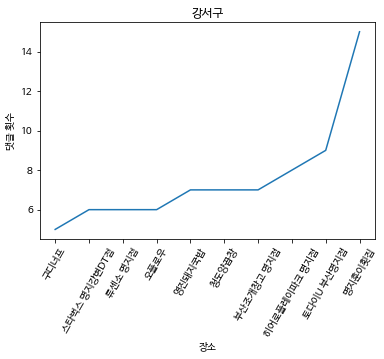

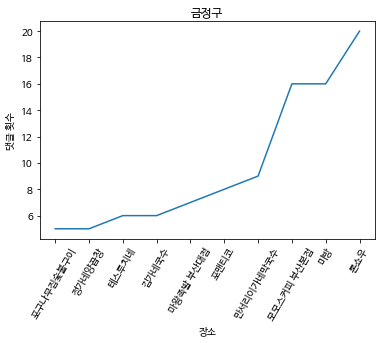

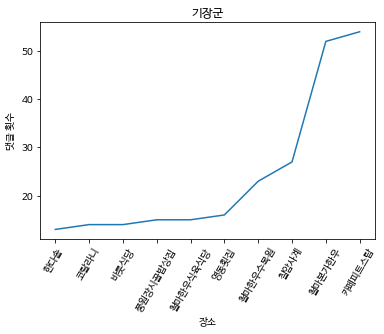

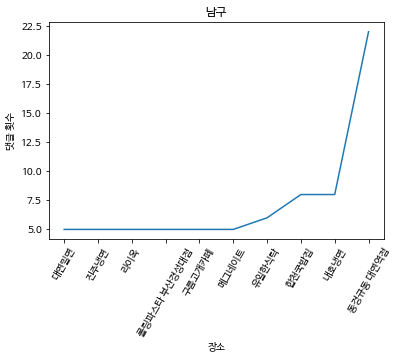

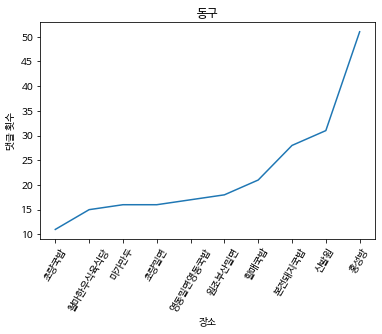

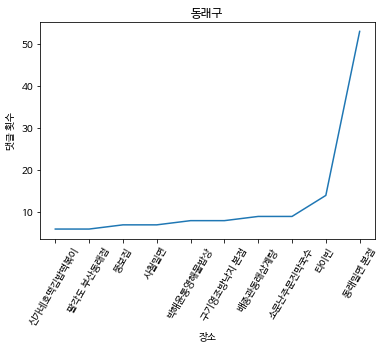

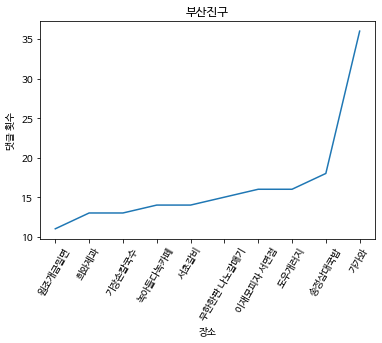

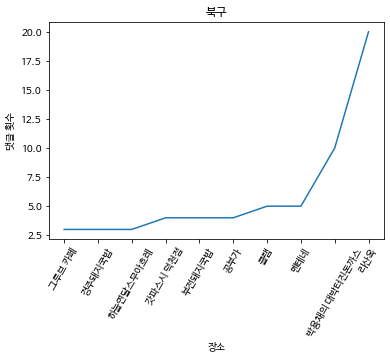

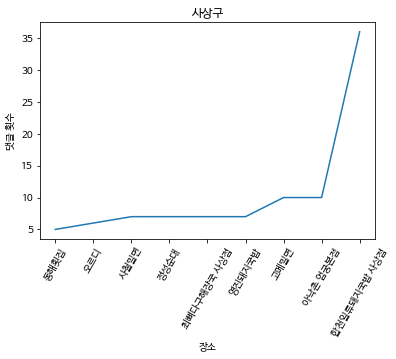

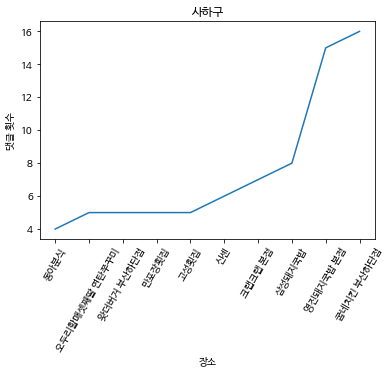

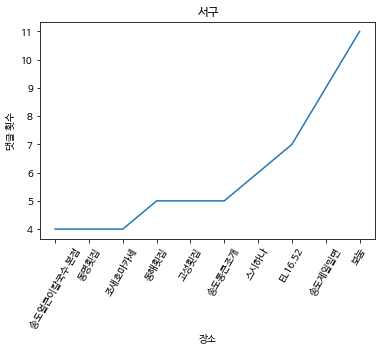

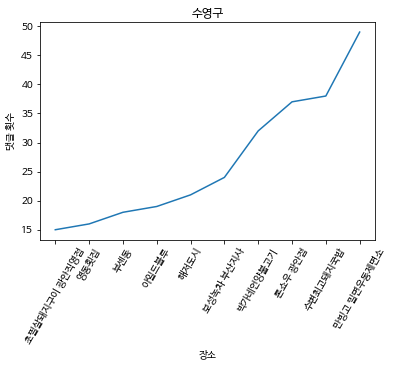

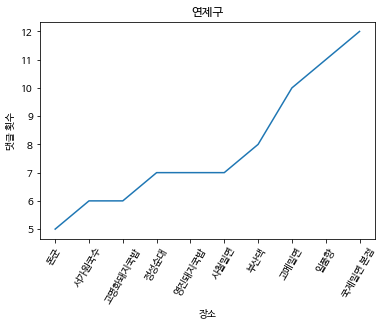

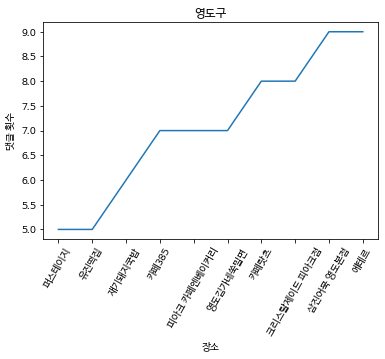

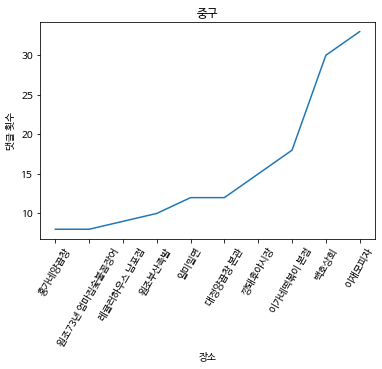

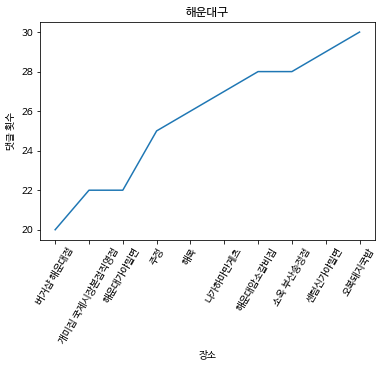

In [ ]:
for re in Region:
  idx = regionFood[regionFood.address == re].index
  nameList = regionFood['place_name'][idx].to_list()
  countList = regionFood['count'][idx].to_list()
  Top10Idx = sorted(range(len(countList)), key=lambda i: countList[i])[-10:]
  x = []
  y = []
  for i in Top10Idx:
    x.append(nameList[i])
    y.append(countList[i])

  plt.plot(x,y)
  plt.xlabel('장소')
  plt.ylabel('댓글 횟수')
  plt.title(re)
  plt.xticks(rotation=60)
  plt.savefig('/content/drive/MyDrive/image/'+re+' 음식 검색 순위.png',facecolor = '#eeeeee')
  plt.show()


관광지 데이터를 이용해 구와 군별로 댓글수가 많은 10개의 장소를 표시한다.

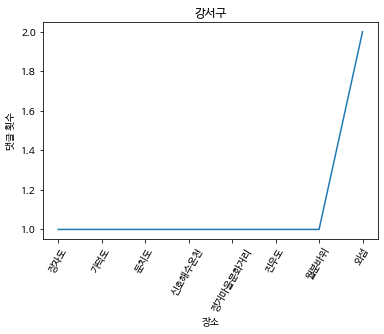

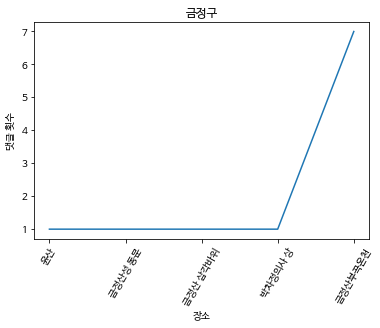

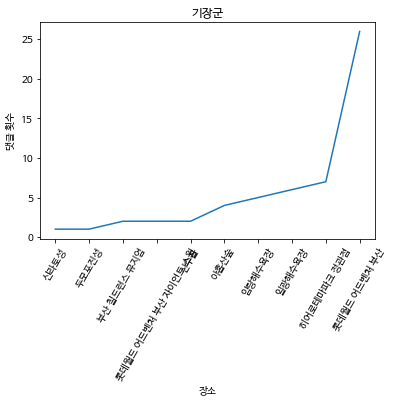

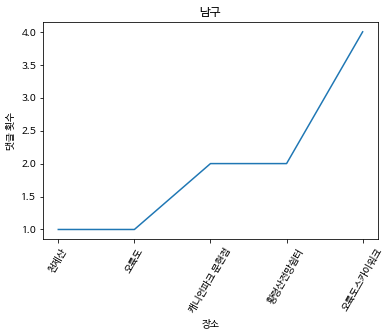

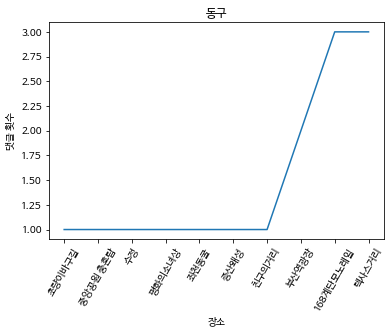

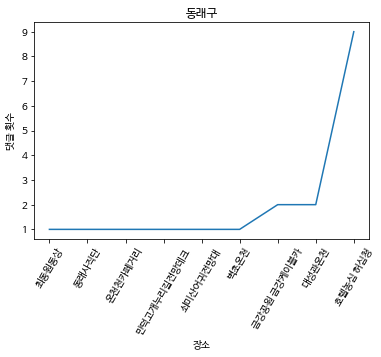

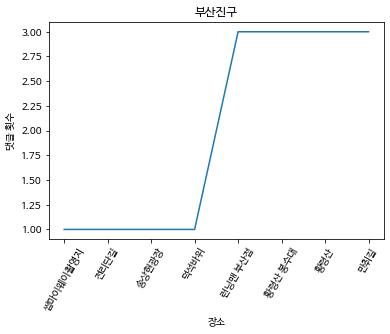

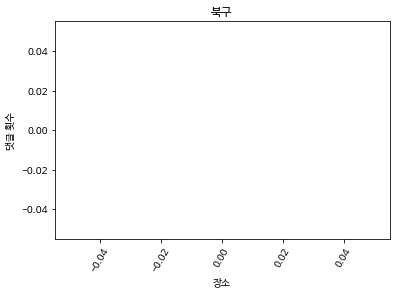

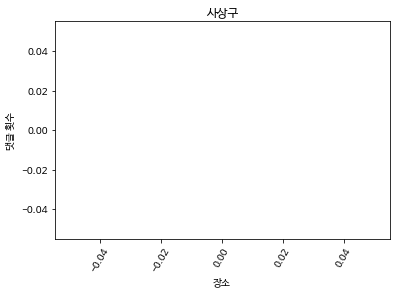

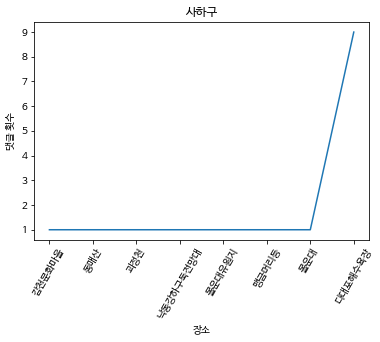

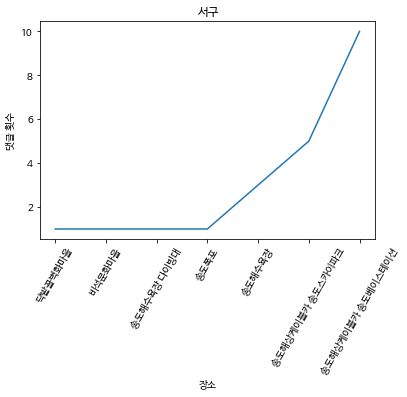

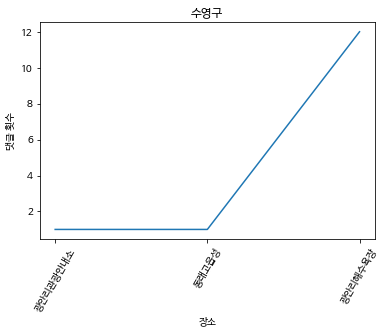

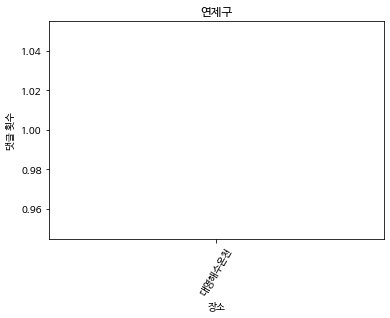

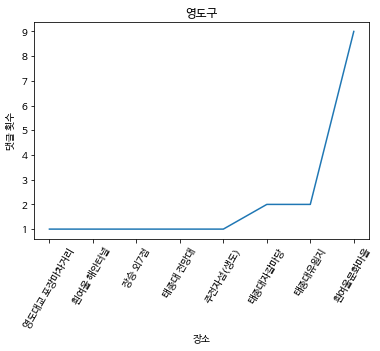

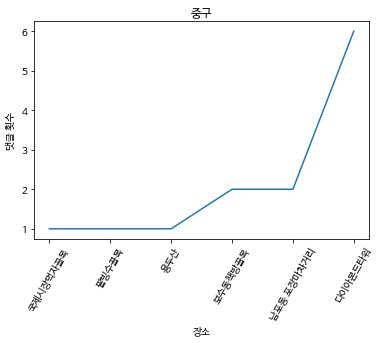

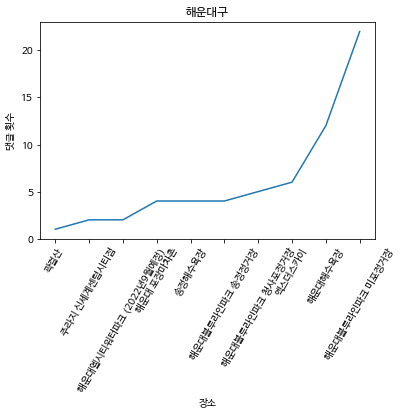

In [ ]:
for re in Region:
  idx = regionTravel[regionTravel.address == re].index
  nameList = regionTravel['place_name'][idx].to_list()
  countList = regionTravel['count'][idx].to_list()
  Top10Idx = sorted(range(len(countList)), key=lambda i: countList[i])[-10:]
  x = []
  y = []
  for i in Top10Idx:
    x.append(nameList[i])
    y.append(countList[i])

  plt.plot(x,y)
  plt.xlabel('장소')
  plt.ylabel('댓글 횟수')
  plt.title(re)
  plt.xticks(rotation=60)
  
  plt.savefig('/content/drive/MyDrive/image/'+ re+' 관광지 검색 순위.png', facecolor = '#eeeeee')
  plt.show()
  



